In [1]:
from matplotlib import pyplot as plt
import pickle
import matplotlib.font_manager as font_manager
import matplotlib.gridspec as gridspec
import numpy as np

In [2]:
plt.rcParams['font.family'] = 'Arial'  # Change to 'sans-serif' if you prefer
plt.rcParams["font.size"] = 20
plt.rcParams['font.weight'] = 'bold'

# Use LaTeX for text rendering
# plt.rcParams['text.usetex'] = True

# Adjust the spacing between axis labels and tick labels
plt.rcParams['xtick.major.pad'] = 4
plt.rcParams['ytick.major.pad'] = 4

# Set the style of the axis spines
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True

# # Set the style of the grid
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.color'] = '#000000'

# # Customize the legend
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
# plt.rcParams['legend.weight'] = 'bold'


# # Customize the color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

alpha = 0.95

In [3]:

with open('plot_datas/ciao_losses.pkl', 'rb') as file:
    ciao_losses = pickle.load(file)

with open('plot_datas/ciao_uplifts.pkl', 'rb') as file:
    ciao_uplifts = pickle.load(file)

# with open('plot_datas/epinions_losses.pkl', 'rb') as file:
#     epinions_losses = pickle.load(file)

# with open('plot_datas/epinions_uplifts.pkl', 'rb') as file:
#     epinions_uplifts = pickle.load(file)

# with open('plot_datas/filmtrust_losses.pkl', 'rb') as file:
#     filmtrust_losses = pickle.load(file)

# with open('plot_datas/filmtrust_uplifts.pkl', 'rb') as file:
#     filmtrust_uplifts = pickle.load(file)

In [4]:
method_names = {
    'spill_groundtruth': 'Oracle',
    'spill_simulation_mf_scale_revision': 'Sim MF',
    'spill_simulation_diffnet_scale_revision': 'Sim DiffNet',
    'spill_simulation_lightgcn_scale_revision': 'Sim LightGCN',
    'spill_mf': 'Direct MF',
    'spill_diffnet': 'Direct DiffNet',
    'spill_lightgcn': 'Direct LightGCN',
    'spill_gatv2_spill_var2': 'NIRec'
}

method_linestyles = {
    'spill_groundtruth': '-',
    'spill_simulation_mf_scale_revision': '-',
    'spill_simulation_diffnet_scale_revision': '-',
    'spill_simulation_lightgcn_scale_revision': '-',
    'spill_mf': '-',
    'spill_diffnet': '-',
    'spill_lightgcn': '-',
    'spill_gatv2_spill_var2': '-'
}

method_colors = {
    'spill_groundtruth': (51 / 255,131 / 255,186 / 255),
    'spill_gatv2_spill_var2': (63 / 255,168 / 255,63 / 255),
    'spill_simulation_mf_scale_revision': (164 / 255,126 / 255,198 / 255),
    'spill_simulation_diffnet_scale_revision': (208 / 255,208 / 255,100 / 255),
    'spill_simulation_lightgcn_scale_revision': (32 / 255, 47 / 255, 200 / 255),
    'spill_mf': (255 / 255,138 / 255,36 / 255),
    'spill_diffnet': (219 / 255,69 / 255,70 / 255),
    'spill_lightgcn': (98 / 255, 31 / 255, 13 / 255),
    
}

methods = method_names.keys()

ciao_populations = [1, 50, 75, 100]
# epinions_populations = [1, 50, 75, 100]
# filmtrust_populations = [1, 25, 50, 75]

ciao_lims = [(0, 3), (0, 60), (0, 60), (0, 60)]
# epinions_lims = [(0, 3), (0, 30), (0, 30), (0, 30)]
# filmtrust_lims = [(0, 0.3), (0, 15), (0, 30), (0, 30)]

ciao_ylims = [(-0.1, 0.7), (-0.2, 0.6), (-0.3, 0.5), (-0.3, 0.5)]
# epinions_ylims = [(-0, 0.7), (-0.1, 0.6), (-0.1, 0.6), (-0.1, 0.6)]
# filmtrust_ylims = [(0, 0.55), (-0.1, 0.45), (-0.1, 0.45), (-0.1, 0.45)]

### Only Ciao

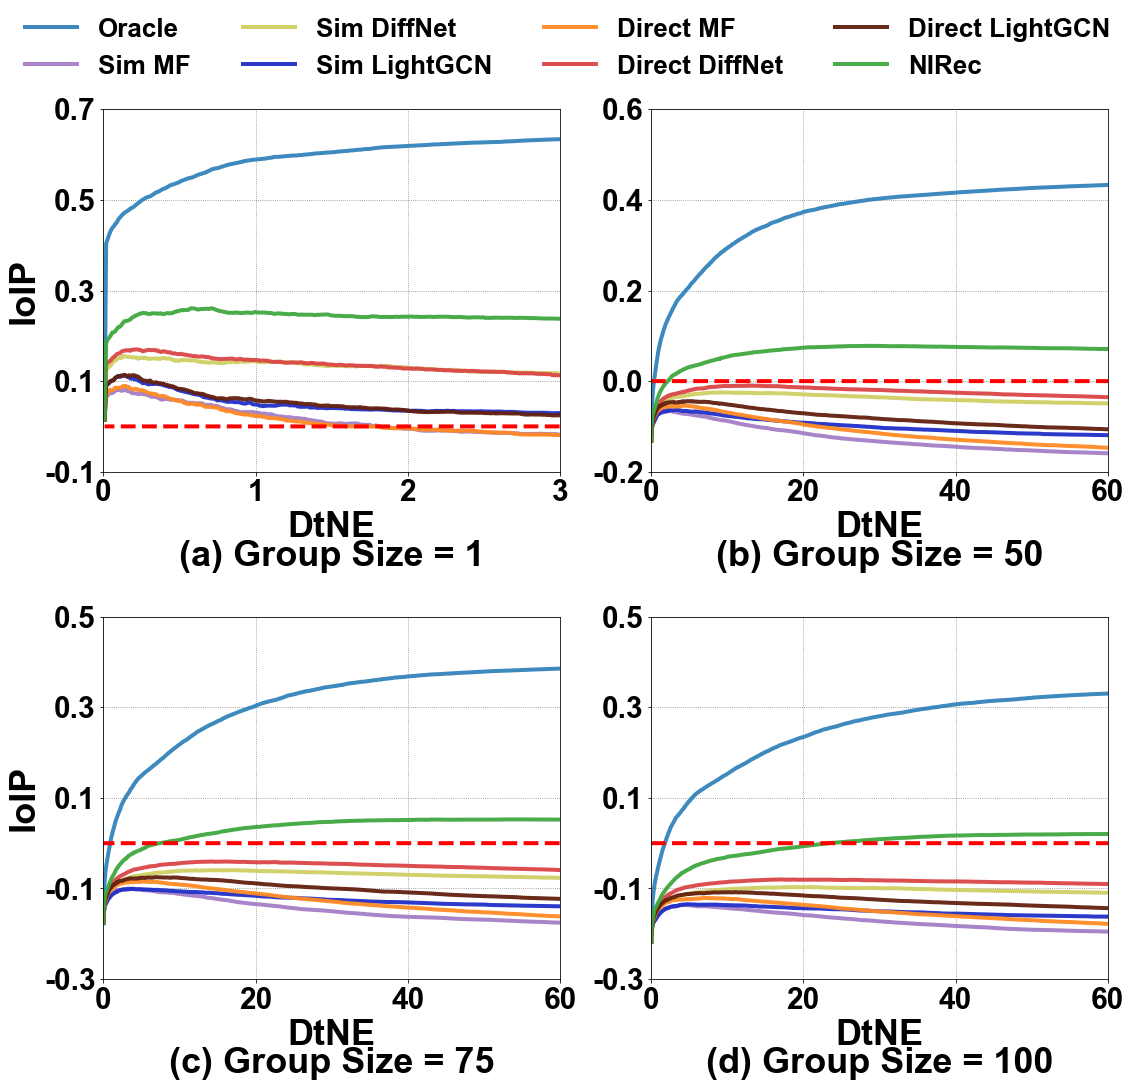

In [5]:
# plt.rcParams["font.family"] = "Corbel"
plt.rcParams["font.size"] = 30
plt.rcParams['font.weight'] = 'bold'
label_font_size = 30

titles = ['(a)', '(b)', '(c)', '(d)']

fig = plt.figure(figsize=(18, 16))
plt.subplots_adjust(hspace=0.4)
# grid = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 1], height_ratios=[0.1, 0.1, 0.1])
for i, _ in enumerate(ciao_populations):
    ax = plt.subplot(2, 2, i + 1)
    for method in methods:
        plt.plot(-ciao_losses[i], ciao_uplifts[i][method], label=method_names[method], linewidth=4, linestyle=method_linestyles[method], alpha=alpha, color=method_colors[method])
    plt.xlabel('DtNE', weight='bold', fontsize=label_font_size + 6)
    if i == 0 or i == 2:
        plt.ylabel('IoIP', weight='bold', fontsize=label_font_size + 6)
#     ax.set_title(f"#Target Users={ciao_populations[i]}", weight='bold')
    ax.set_title(f"{titles[i]} Group Size = {ciao_populations[i]}", y=-0.22, pad=-14, weight='bold')
    plt.xlim(ciao_lims[i])
    plt.ylim(ciao_ylims[i])
    plt.yticks(np.arange(ciao_ylims[i][0], ciao_ylims[i][1] + 0.01, 0.2))
    plt.grid()
    plt.plot(-ciao_losses[i], [0 for _ in ciao_losses[i]], color='red', linestyle='--', linewidth=4)
handles, labels = ax.get_legend_handles_labels()
font = font_manager.FontProperties(family= 'Arial',  # 'Times new roman', 
                                   weight='bold',
                                   style='normal', size=26)
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.92, 0.98), ncol=4, prop=font)
# plt.tight_layout() 
plt.savefig('overall_ciao_revision.pdf', bbox_inches='tight')